<h1 style='color: red; font-size: 36px; font-weight: bold;'>Projeto: Previsão de Crimes no Estado de São Paulo</h1>

# <font color='red' style='font-size: 30px;'>Conhecendo o Dataset</font>
<hr style='border: 2px solid red;'>

## Importando bibliotecas

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

## O Dataset e o Projeto
<hr>

### Fonte: http://www.ssp.sp.gov.br/transparenciassp/Consulta.aspx

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Este projeto procura analisar e desenvolver um modelo preditivo baseado em dados históricos da Segurança Pública a fim de prever a ocorrência de crimes no Estado de São Paulo. A intenção geral é fornecer informações sobre a segurança de determinados bairros, dependendo do local e horário para as pessoas, contribuindo para a promoção de um ambiente mais seguro. </p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Vamos utilizar as datasets disponíveis no Portal da Transparência. Este dataset contém as informações dos 3 últimos anos de boletins de ocorrência de furtos e roubos.</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
  <li><b>periodo</b>: Indica período em que BO foi registrado.</li>
  <li><b>anoBO</b>: Indica ano em que BO foi registrado.</li>
  <li><b>numeroBO</b>: Indica número do BO.</li>
  <li><b>numeroBoletim</b>: Indica protocolo do BO.</li>
  <li><b>boIniciado</b>: Indica data de abertura do BO.</li>
  <li><b>boEmitido</b>: Indica data de emissão do BO.</li>
  <li><b>dataOcorrencia</b>: Indica data da ocorrência de Roubo/Furto.</li>
  <li><b>horaOcorrencia</b>: Indica o horário da ocorrência de Roubo/Furto.</li>
  <li><b>periodoOcorrencia</b>: Indica o período do dia da ocorrência de Roubo/Furto.</li>
  <li><b>dataComunicacao</b>Indica data da comunicação do ocorrido.</li>
  <li><b>boAutoria</b>: - </li>
  <li><b>flagrante</b>: Indica se houve flagrante no ato da ocorrência.</li>
  <li><b>numeroBoletimPrincipal</b>:</li>
  <li><b>logradouro</b>: Logradouro da ocorrência.</li>
  <li><b>numero</b>: Número do logradouro da ocorrência.</li>
  <li><b>bairro</b>: Bairro da ocorrência.</li>
  <li><b>cidade</b>: Cidade da ocorrência.</li>
  <li><b>descricaoLocal</b>: Descreve grupo de tipos de locais onde se deu o fato.</li>
  <li><b>solucao</b>: Soluções tomadas pelo Departamento de Polícia.</li>
  <li><b>tipoDelegacia</b>: Indica se BO foi registrado na delegacia física (0) ou digital (1). </li>
  <li><b>rubrica</b>: Natureza jurídica da ocorrência.</li>
  <li><b>consumado</b>: Indica se é crime consumado (1) ou tentado (0).</li>
  <li><b>vitimaFatal</b>: Se houve (1) ou não (0) vítima fatal.</li>
  <li><b>sexo</b>: Sexo da vítima.</li>
  <li><b>idade</b>: Idade da vítima.</li>
  <li><b>estadoCivil</b>: Estado civil da vítima.</li>
  <li><b>profissao</b>: Profissão da vítima.</li>
  <li><b>grauInstrucao</b>: Grau de instrução da vítima.</li>
  <li><b>cor</b>: Cor da pele da vítima.</li>
  <li><b>quantidadeCelular</b>: Indica a quantidade de celulares roubadas/furtadas.</li>
  <li><b>marcaCelular</b>: Indica a marca da celular roubada/furtada.</li>
</ul>


## Leitura dos dados

Dataset está na pasta "dados" com o nome "boletins_2018_2023.csv" e usa "\t" como separador.

In [2]:
dados = pd.read_csv('Dados\\boletins_2018_2023.csv', sep='\t', encoding='utf-16', low_memory=False)

## Visualizar os dados

In [3]:
# Visualizando todas as colunas.
pd.set_option('display.max_columns', None)

dados.head()

,id_categoria,categoria,periodo_boletim,dia_semana_boletim,numero_boletim,numero_boletim_principal,boletim_iniciado,boletim_emitido,periodo_ocorrencia,data_ocorrencia,hora_ocorrencia,dia_semana_ocorrencia,periodo_dia_ocorrencia,logradouro,numero,bairro,id_cidade,cidade,descricao_local,solucao,tipo_delegacia,nome_delegacia,rubrica,flagrante,consumado,vitima_fatal,sexo,idade,estado_civil,profissao,grau_instrucao,cor,quantidade_celular,marca_celular,id_arquivo
0,2,RouboCelular,2018-01,2,5/2018,NaN,2018-01-01 08:21:06,2018-01-01 13:21:09,2018-01,2018-01-01,04:30:00,2,MADRUGADA,NaN,NaN,NaN,NaN,NaN,RESIDÊNCIA,ENCAMINHAMENTO DP ÁREA DO FATO,1,DEL.SEC.BARRETOS PLANTÃO,ROUBO (ART. 157) - OUTROS,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,1,OUTROS,262
1,2,RouboCelular,2018-01,2,5/2018,NaN,2018-01-01 08:21:06,2018-01-01 13:21:09,2018-01,2018-01-01,04:30:00,2,MADRUGADA,NaN,NaN,NaN,NaN,NaN,RESIDÊNCIA,ENCAMINHAMENTO DP ÁREA DO FATO,1,DEL.SEC.BARRETOS PLANTÃO,ART. 213 - ESTUPRO,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,1,OUTROS,262
2,2,RouboCelular,2018-01,2,21/2018,NaN,2018-01-01 14:23:42,2018-01-01 16:06:24,2018-01,2018-01-01,00:00:00,2,HORA INCERTA,NaN,NaN,NaN,NaN,NaN,VIA PÚBLICA,ENCAMINHAMENTO DP ÁREA DO FATO,1,DEL.SEC.S.J RIO PRETO PLANTÃO,ROUBO (ART. 157) - TRANSEUNTE,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,1,ASUS,262
3,2,RouboCelular,2018-01,2,21/2018,NaN,2018-01-01 14:23:42,2018-01-01 16:06:24,2018-01,2018-01-01,00:00:00,2,HORA INCERTA,NaN,NaN,NaN,NaN,NaN,VIA PÚBLICA,ENCAMINHAMENTO DP ÁREA DO FATO,1,DEL.SEC.S.J RIO PRETO PLANTÃO,ESTUPRO DE VULNERAVEL (ART.217-A),0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,1,ASUS,262
4,2,RouboCelular,2018-01,5,112/2018,NaN,2018-01-04 12:00:32,2018-01-04 13:50:53,2018-01,2018-01-01,22:40:00,2,NOITE,NaN,NaN,NaN,NaN,NaN,VIA PÚBLICA,BO PARA INVESTIGAÇÃO,1,24º D.P. PONTE RASA,ROUBO (ART. 157) - TRANSEUNTE,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,1,LG,262


## Verificando o tamanho do dataset

In [4]:
linhas, colunas = dados.shape
print(f'{linhas} linhas\n{colunas} colunas')

2399135 linhas
35 colunas


## Verificando os tipos de dados

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2399135 entries, 0 to 2399134
Data columns (total 35 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   id_categoria              int64  
 1   categoria                 object 
 2   periodo_boletim           object 
 3   dia_semana_boletim        int64  
 4   numero_boletim            object 
 5   numero_boletim_principal  object 
 6   boletim_iniciado          object 
 7   boletim_emitido           object 
 8   periodo_ocorrencia        object 
 9   data_ocorrencia           object 
 10  hora_ocorrencia           object 
 11  dia_semana_ocorrencia     int64  
 12  periodo_dia_ocorrencia    object 
 13  logradouro                object 
 14  numero                    float64
 15  bairro                    object 
 16  id_cidade                 float64
 17  cidade                    object 
 18  descricao_local           object 
 19  solucao                   object 
 20  tipo_delegacia          

In [6]:
# Verificando os valores nulos na dataframe.
dados.isnull().sum()

id_categoria                      0
categoria                         0
periodo_boletim                   0
dia_semana_boletim                0
numero_boletim                    0
numero_boletim_principal    2155354
boletim_iniciado                  0
boletim_emitido                   0
periodo_ocorrencia                0
data_ocorrencia                   0
hora_ocorrencia              676979
dia_semana_ocorrencia             0
periodo_dia_ocorrencia            0
logradouro                   169743
numero                         3178
bairro                        50964
id_cidade                      3213
cidade                         3213
descricao_local                   0
solucao                           0
tipo_delegacia                    0
nome_delegacia                    0
rubrica                           0
flagrante                         0
consumado                         0
vitima_fatal                      0
sexo                        2392316
idade                       

### Padronizando as colunas para o tipo correto

In [7]:
# Convertendo para datetime as colunas que são datas.
dados['boletim_iniciado'] = pd.to_datetime(dados['boletim_iniciado'])
dados['boletim_emitido'] = pd.to_datetime(dados['boletim_emitido'])
dados['data_ocorrencia'] = pd.to_datetime(dados['data_ocorrencia'])

# Convertendo para time as colunas que são horas.
dados['hora_ocorrencia'] = pd.to_datetime(dados['hora_ocorrencia'], format='%H:%M:%S').dt.time

# Convertendo para inteiro as colunas que são números inteiros.
dados['numero'] = dados['numero'].fillna(0).astype(int)
dados['id_cidade'] = dados['id_cidade'].fillna(0).astype(int)
dados['idade'] = dados['idade'].fillna(0).astype(int)

### Padronizando os dados da coluna "periodoOcorrencia"
* DE MADRUGADA: 0h às 6h
* PELA MANHÃ: 6h às 12h
* A TARDE: 12h às 18h
* A NOITE: 18h às 0h

In [8]:
# Função para categorizar as horas
def categorizar_horas(hora):
    if 0 <= hora.hour < 6:
        return 'MADRUGADA'
    elif 6 <= hora.hour < 12:
        return 'MANHÃ'
    elif 12 <= hora.hour < 18:
        return 'TARDE'
    elif 18 <= hora.hour < 24:
        return 'NOITE'
    else:
        return 'HORA INCERTA'

# Aplicando a função para categorizar as horas da ocorrência corretamente na coluna "periodoOcorrencia"
dados['periodo_ocorrencia_corrigido'] = dados['hora_ocorrencia'].apply(categorizar_horas)

In [9]:
# Deletando os dados duplicados.
dados.drop_duplicates(inplace=True)

# Resetando o index. 
dados.reset_index(drop=True, inplace= True)

# Exibindo as informações das colunas padronizadas.
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2232185 entries, 0 to 2232184
Data columns (total 36 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   id_categoria                  int64         
 1   categoria                     object        
 2   periodo_boletim               object        
 3   dia_semana_boletim            int64         
 4   numero_boletim                object        
 5   numero_boletim_principal      object        
 6   boletim_iniciado              datetime64[ns]
 7   boletim_emitido               datetime64[ns]
 8   periodo_ocorrencia            object        
 9   data_ocorrencia               datetime64[ns]
 10  hora_ocorrencia               object        
 11  dia_semana_ocorrencia         int64         
 12  periodo_dia_ocorrencia        object        
 13  logradouro                    object        
 14  numero                        int32         
 15  bairro                        ob

### Separando as dataframes: dados_ocorrencias, dados_vitimas e dados_celular

In [10]:
# Dividir o DataFrame em três partes com base nas colunas.
dados_ocorrencias = dados.iloc[:, :26]
dados_vitimas = dados.iloc[:, 26:32]
dados_celular = dados.iloc[:, 32:35]

### Separando as dataframes: dados_furto e dados_roubo

In [11]:
# Separando os dados de id_categoria 1 = Furto
dados_furto = dados_ocorrencias.loc[dados_ocorrencias['id_categoria'] == 1]

# Separando os dados de id_categoria 2 = Roubo
dados_roubo = dados_ocorrencias.loc[dados_ocorrencias['id_categoria'] == 2]

# <font color='red' style='font-size: 30px;'>Análises Preliminares</font>
<hr style='border: 2px solid red;'>

# Análises gráficas

## Importando biblioteca seaborn

In [12]:
import seaborn as sns

## Configurando o estilo e cor dos gráficos

In [13]:
sns.set_palette("rocket_r")

## Análises: Ocorrências

### Boletins registrados por ano

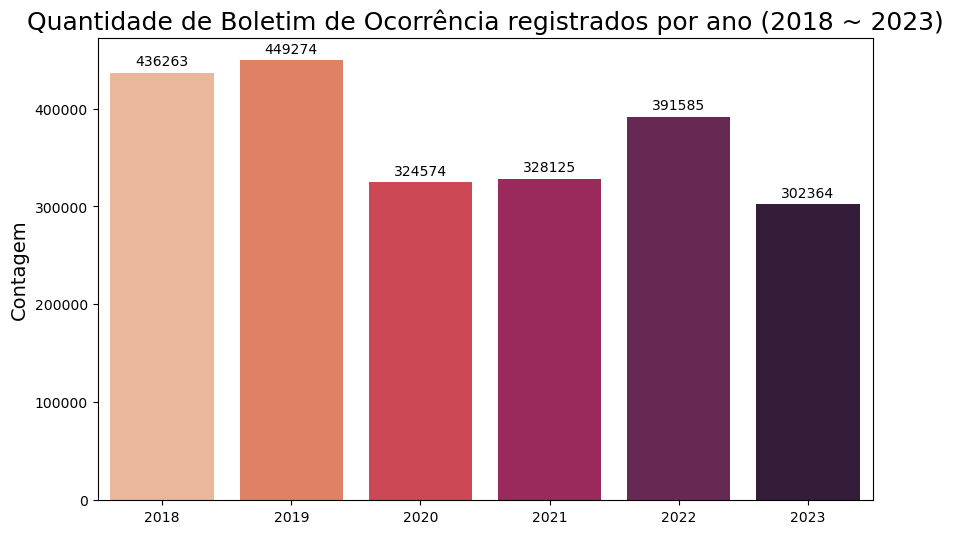

In [14]:
# Contar a quantidade de BO registrados por ano.
contagem = dados_ocorrencias['boletim_emitido'].dt.year.value_counts().sort_index()

# Gerando o gráfico.
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x=contagem.index, y=contagem.values)
ax.set_title('Quantidade de Boletim de Ocorrência registrados por ano (2018 ~ 2023)', loc='center', fontsize=18)
ax.set_xlabel('')
ax.set_ylabel('Contagem', fontsize=14)
# Adicionando labels aos valores das barras.
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 8), 
                textcoords = 'offset points')
fig = plt.gcf()
plt.show()

# Salvando o gráfico na pasta Graficos.
fig.savefig('Graficos/quantidade_BO_ano.png', transparent=False, dpi=300, bbox_inches='tight')

### Ocorrências por mês (2018 ~ 2023)

In [15]:
# Filtrando as ocorrências a partir do 2018-01-01 em diante.
datas_invalidas = (dados_ocorrencias['data_ocorrencia'] < '2018-01-01')
dados_ocorrencias.drop(dados_ocorrencias[datas_invalidas].index, inplace=True)
dados_ocorrencias.reset_index(drop=True, inplace= True)

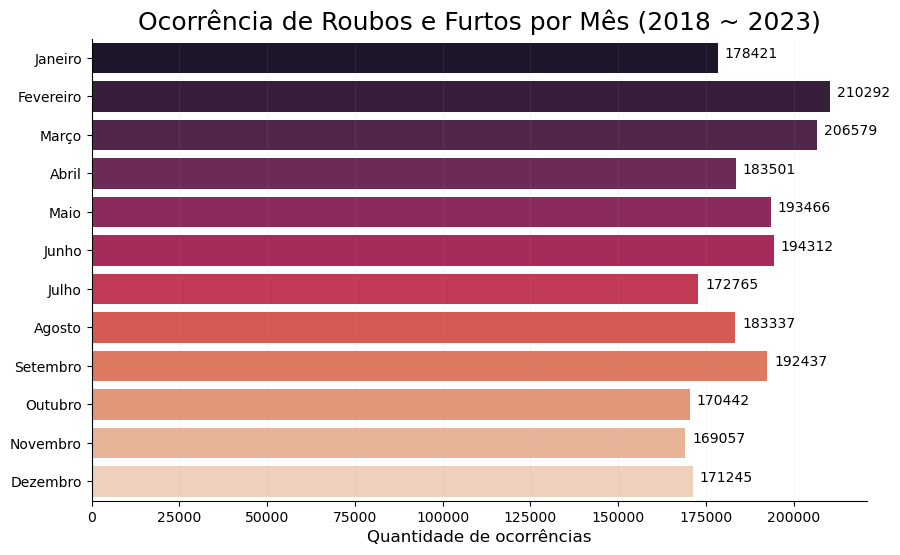

In [16]:
# Contar a quantidade de ocorrências por mês.
contagem = dados_ocorrencias['data_ocorrencia'].dt.month.value_counts().sort_index()

# Gerando o gráfico.
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x=contagem.values, y=contagem.index, orient ='h', palette='rocket')
ax.set_title('Ocorrência de Roubos e Furtos por Mês (2018 ~ 2023)', loc='center', fontsize=18)
ax.set_ylabel('')
ax.set_xlabel('Quantidade de ocorrências', fontsize=12)
ax.set_yticklabels(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'])
sns.despine()
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.0f'), 
                (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2.), 
                xytext=(5, 0), 
                textcoords='offset points')
plt.grid(axis='x', alpha=0.1)
fig = plt.gcf()
plt.show()  

# Salvando o gráfico na pasta Graficos.
fig.savefig('Graficos/quantidade_ocorrencia_mensal.png', transparent=False, dpi=300, bbox_inches='tight')

### Distribuição de ocorrências de roubos e furtos por ano

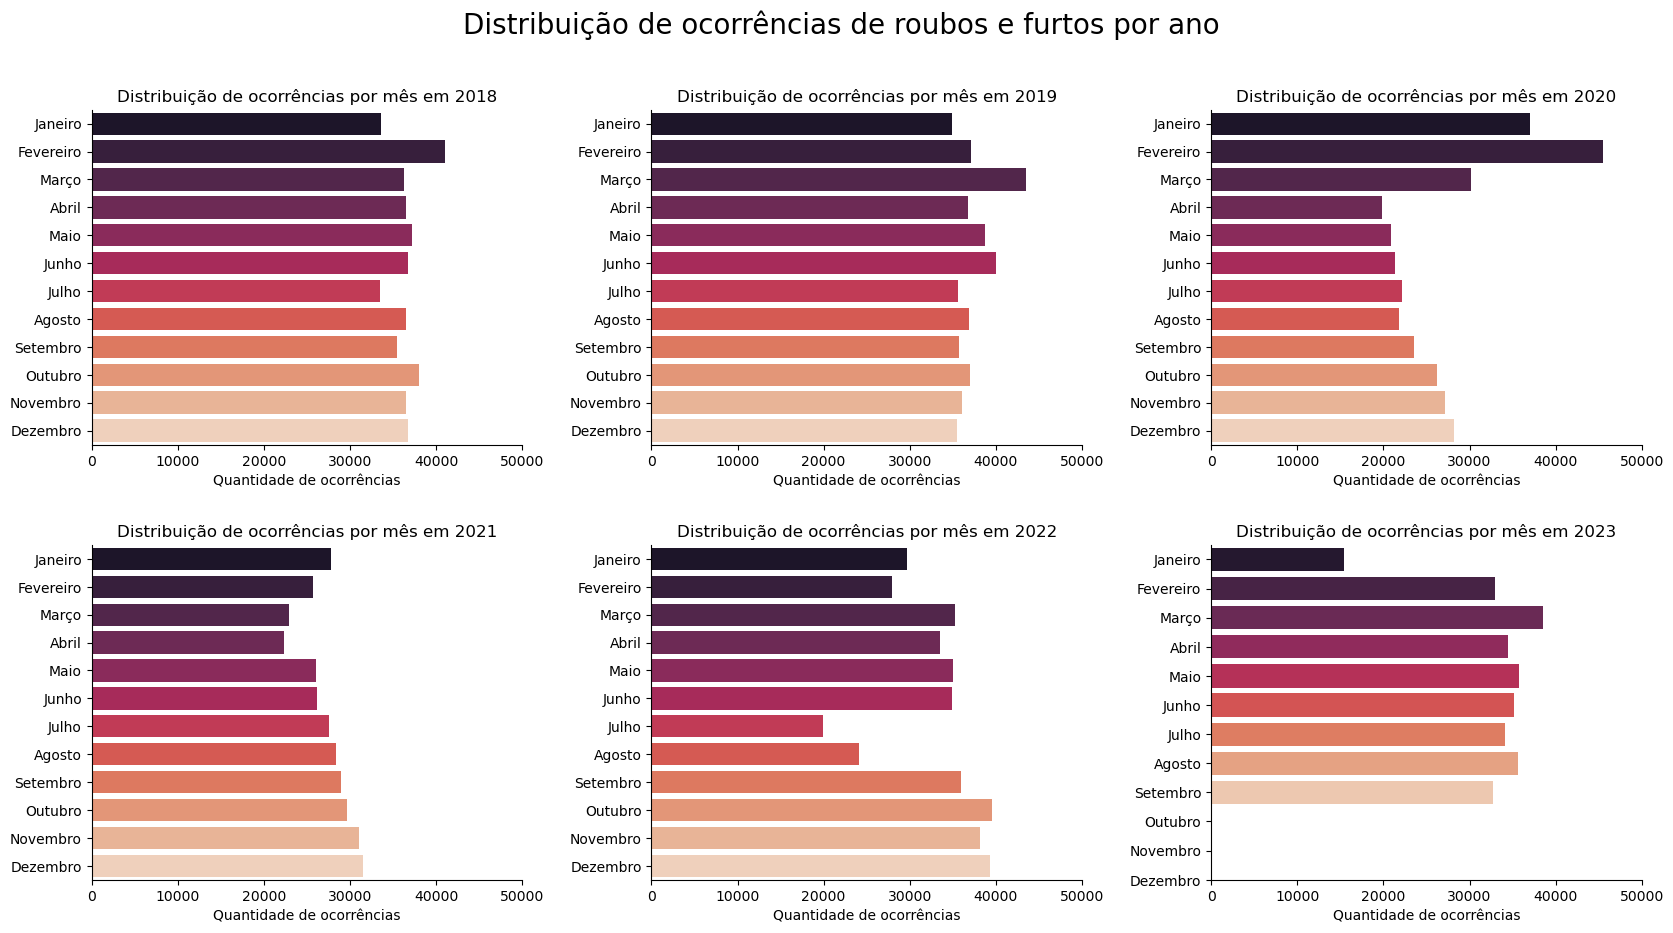

In [17]:
# Criando coluna anoOcorrencia.
dados_ocorrencias['ano_ocorrencia'] = dados_ocorrencias['data_ocorrencia'].dt.year
dados_ocorrencias['mes_ocorrencia'] = dados_ocorrencias['data_ocorrencia'].dt.month

# Agrupando os dados por mês e ano e contando as ocorrências.
ocorrencias_por_mes = dados_ocorrencias.groupby([dados_ocorrencias['ano_ocorrencia'], dados_ocorrencias['mes_ocorrencia']]).size().reset_index(name='contagem')

# Gerando 6 gráficos.
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

# Gerando os gráficos por mês e ano.
for i, ano in enumerate([2018, 2019, 2020, 2021, 2022, 2023]):
    row = i // 3
    col = i % 3
    data = ocorrencias_por_mes.loc[(ocorrencias_por_mes['ano_ocorrencia'] == ano), :]
    sns.barplot(x='contagem', y='mes_ocorrencia', data=data, orient='h', palette='rocket', ax=axs[row, col])
    axs[row, col].set_title(f'Distribuição de ocorrências por mês em {ano}')
    axs[row, col].set_xlabel('Quantidade de ocorrências')
    axs[row, col].set_xticks(range(0, 50001, 10000))
    axs[row, col].set_xticklabels(['0', '10000', '20000', '30000', '40000', '50000'])
    axs[row, col].set_ylabel('')
    axs[row, col].set_yticks(range(12))
    axs[row, col].set_yticklabels(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'])
    sns.despine()
fig.subplots_adjust(hspace=0.3, wspace=0.3)
fig.suptitle('Distribuição de ocorrências de roubos e furtos por ano', fontsize=20)

fig = plt.gcf()
plt.show()  

# Salvando o gráfico na pasta Graficos.
fig.savefig('Graficos/quantidade_ocorrencias_ano_mes.png', transparent=False, dpi=300, bbox_inches='tight')

### Ocorrência por dia da semana

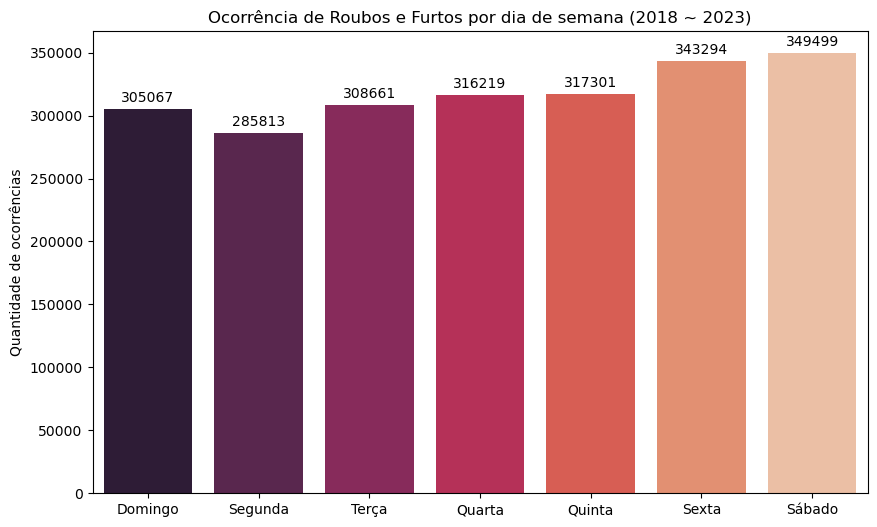

In [18]:
contagem = dados_ocorrencias['dia_semana_ocorrencia'].value_counts().sort_index()

# Renomeando as categorias dos dias da semana.
contagem = contagem.rename({1: 'Domingo', 2: 'Segunda', 3: 'Terça', 4: 'Quarta', 5: 'Quinta', 6: 'Sexta', 7: 'Sábado'})

# Gerando o gráfico.
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x=contagem.index, y=contagem.values, orient ='v', palette='rocket', ax=ax)
ax.set(title='Ocorrência de Roubos e Furtos por dia de semana (2018 ~ 2023)', xlabel='', ylabel='Quantidade de ocorrências', xticklabels=contagem.index)
fig.savefig('Graficos/quantidade_ocorrencia_semanal.png', transparent=False, dpi=300, bbox_inches='tight')
contagem = dados_ocorrencias['dia_semana_ocorrencia'].value_counts()
# Adicionando labels aos valores das barras.
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 8), 
                textcoords = 'offset points')

# Salvando o gráfico na pasta Graficos.
fig.savefig('Graficos/quantidade_ocorrencia_semanal.png', transparent=False, dpi=300, bbox_inches='tight')

### Ocorrência por período

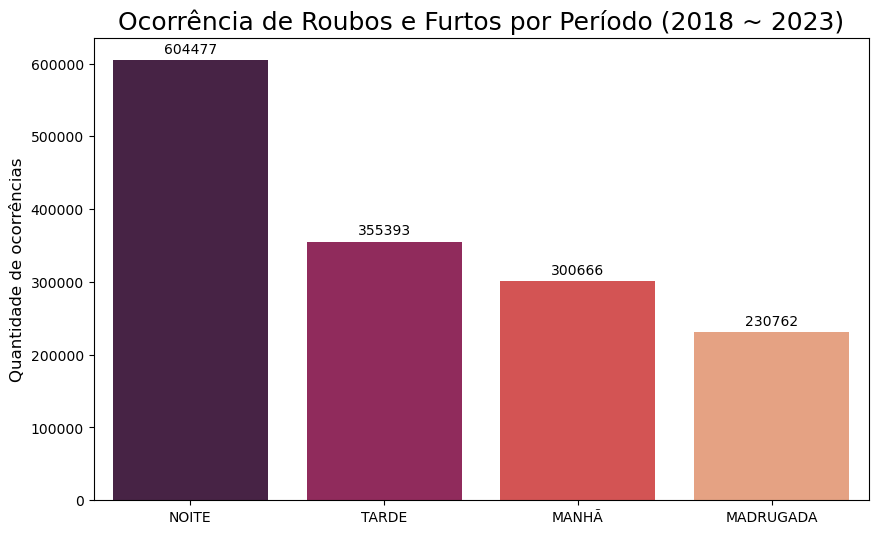

In [19]:
# Filtrando, contando e ordenando os dados.
categoria_indesejada = 'HORA INCERTA'
dados_filtrados = dados_ocorrencias[dados_ocorrencias['periodo_dia_ocorrencia'] != categoria_indesejada]
dados_filtrados = dados_filtrados['periodo_dia_ocorrencia'].value_counts().sort_values(ascending=False).reset_index()
dados_filtrados.columns = ['periodo_dia_ocorrencia', 'Contagem']

# Gerando o gráfico.
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=dados_filtrados, x='periodo_dia_ocorrencia', y='Contagem', palette='rocket')
ax.set_title('Ocorrência de Roubos e Furtos por Período (2018 ~ 2023)', loc='center', fontsize=18)
ax.set_xlabel('')
ax.set_ylabel('Quantidade de ocorrências', fontsize=12)
# Adicionando labels aos valores das barras.
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center',
                xytext = (0, 8), 
                textcoords = 'offset points')
fig = plt.gcf()
plt.show()

# Salvando o gráfico na pasta Graficos.
fig.savefig('Graficos/quantidade_ocorrencia_periodo.png', transparent=False, dpi=300, bbox_inches='tight')

### Top 10 cidades com mais ocorrências

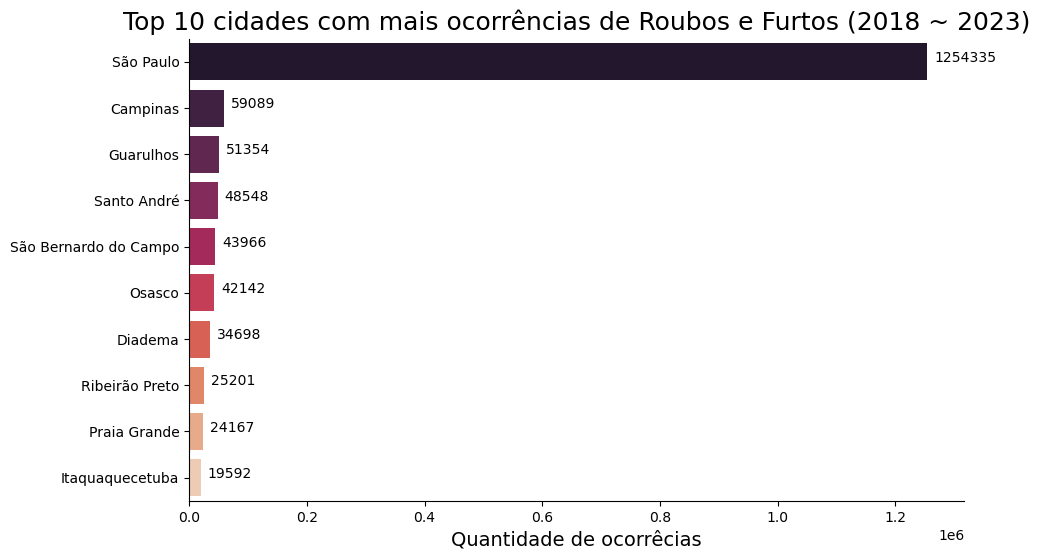

In [20]:
# Verificando as 10 cidades com mais ocorrências.
contagem = dados_ocorrencias['cidade'].value_counts().head(10)

# Gerando o gráfico.
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x=contagem.values, y=contagem.index, orient ='h', palette='rocket')
ax.set_title('Top 10 cidades com mais ocorrências de Roubos e Furtos (2018 ~ 2023)', loc='center', fontsize=18)
ax.set_xlabel('Quantidade de ocorrêcias', fontsize=14)
ax.set_ylabel('')
sns.despine()
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.0f'), 
                (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2.), 
                xytext=(5, 0), 
                textcoords='offset points')
fig = plt.gcf()
plt.show()

# Salvando o gráfico na pasta Graficos.
fig.savefig('Graficos/top10_cidades.png', transparent=False, dpi=300, bbox_inches='tight')

### Top 10 bairros com mais ocorrências

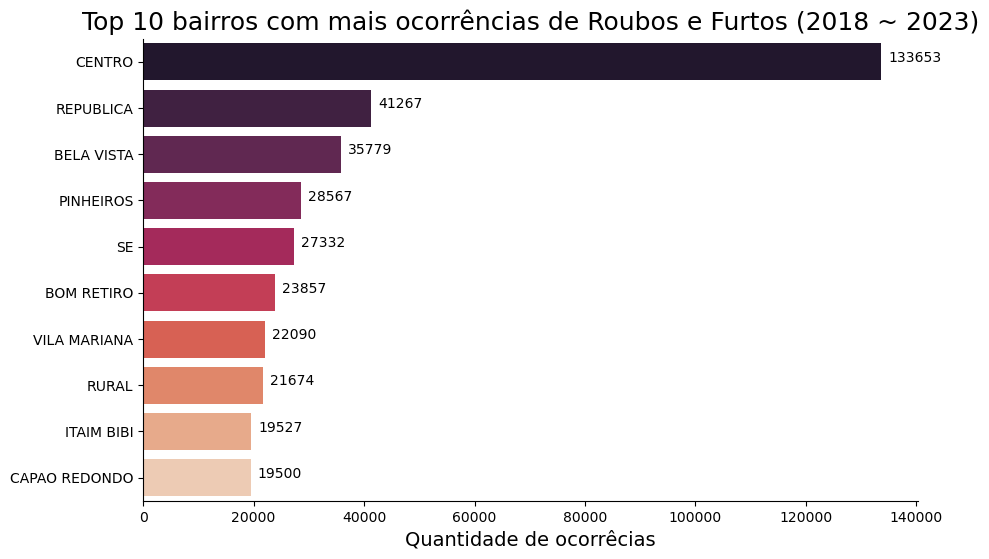

In [21]:
# Verificando os 10 bairros com mais ocrrências.
contagem = dados_ocorrencias['bairro'].value_counts().head(10)

# Gerando o gráfico.
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x=contagem.values, y=contagem.index, orient ='h', palette='rocket')
ax.set_title('Top 10 bairros com mais ocorrências de Roubos e Furtos (2018 ~ 2023)', loc='center', fontsize=18)
ax.set_xlabel('Quantidade de ocorrêcias', fontsize=14)
ax.set_ylabel('')
sns.despine()
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.0f'), 
                (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2.), 
                xytext=(5, 0), 
                textcoords='offset points')
fig = plt.gcf()
plt.show()

# Salvando o gráfico na pasta Graficos.
fig.savefig('Graficos/top10_bairros.png', transparent=False, dpi=300, bbox_inches='tight')

## Análises: Vítimas

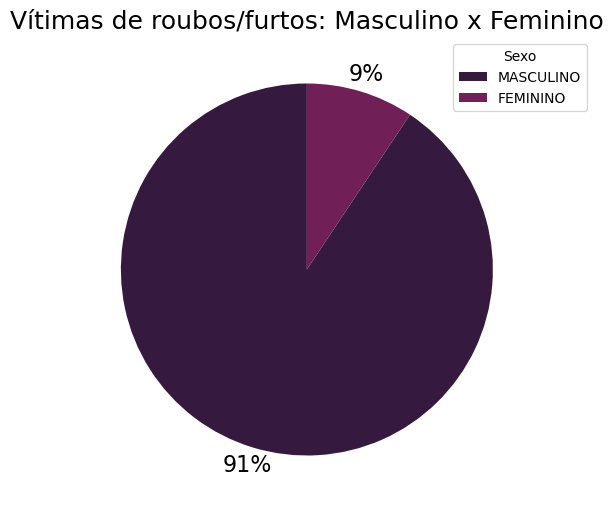

In [22]:
sns.set_palette("rocket")
# Contando as vítimas por sexo.
contagem = dados_vitimas['sexo'].value_counts()

# Gerando o gráfico.
fig, ax = plt.subplots(figsize=(6,7))
ax.pie(x=contagem.values, autopct='%.0f%%', startangle=90, textprops={'color': 'black', 'fontsize': 16}, pctdistance=1.1)
ax.set_title('Vítimas de roubos/furtos: Masculino x Feminino', fontsize=18, loc='center')
ax.legend(contagem.index, title='Sexo', loc='upper left', bbox_to_anchor=(0.8,1))
fig = plt.gcf()
plt.show()

# Salvando o gráfico na pasta Graficos.
fig.savefig('Graficos/vitima_sexo.png', transparent=False, dpi=300, bbox_inches='tight')

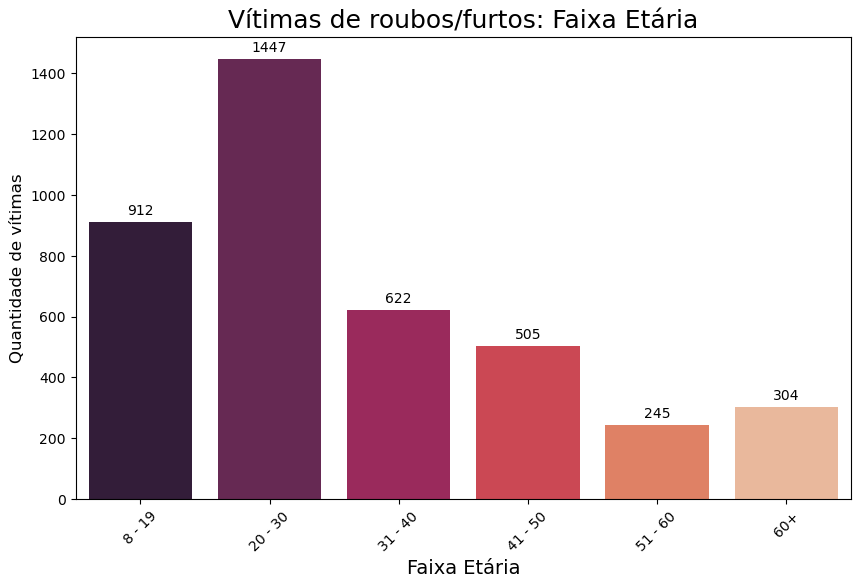

In [23]:
# Criando rótulos.
faixas_etarias = [8, 20, 31, 41, 51, 60, 100] 
rotulos_faixas = ['8 - 19', '20 - 30', '31 - 40', '41 - 50', '51 - 60', '60+']

idade_invalido = dados_vitimas['idade'] == 0
dados_filtrados = dados_vitimas.drop(dados_vitimas[idade_invalido].index)
dados_filtrados['faixa_etaria'] = pd.cut(dados_filtrados['idade'], bins=faixas_etarias, labels=rotulos_faixas, right=False)
contagem = dados_filtrados['faixa_etaria'].value_counts().sort_index()

# Gerando o gráfico.
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x=contagem.index, y=contagem.values, orient ='v', palette='rocket')
ax.set_title('Vítimas de roubos/furtos: Faixa Etária', loc='center', fontsize=18)
plt.xlabel('Faixa Etária', fontsize=14)
ax.set_ylabel('Quantidade de vítimas', fontsize=12)
plt.xticks(rotation=45)
# Adicionando labels aos valores das barras.
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 8), 
                textcoords = 'offset points')
fig = plt.gcf()
plt.show()  

# Salvando o gráfico na pasta Graficos.
fig.savefig('Graficos/vitima_idade.png', transparent=False, dpi=300, bbox_inches='tight')

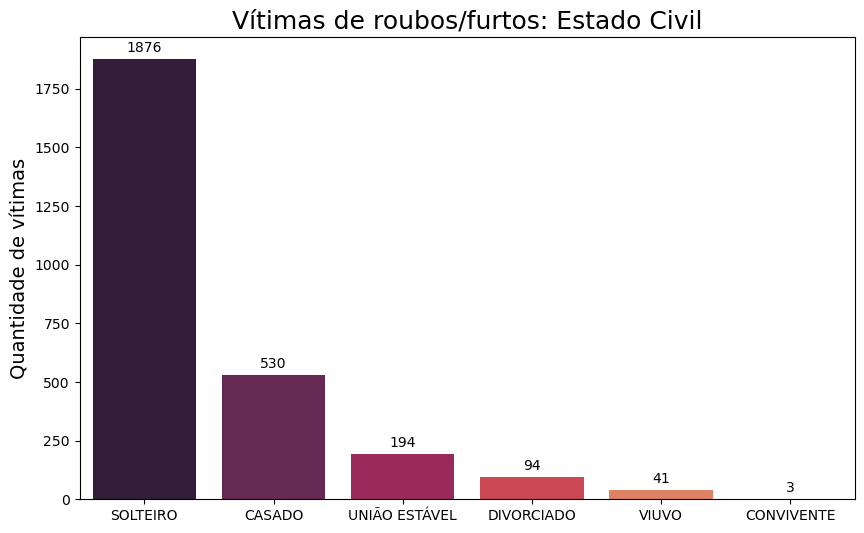

In [24]:
# Filtrando, contando e ordenando os dados.
dados_ignorados = 'IGNORADO'
dados_filtrados = dados_vitimas.dropna(subset=['estado_civil'])
dados_filtrados = dados_filtrados[dados_filtrados['estado_civil'] != dados_ignorados]
dados_ordenados = dados_filtrados['estado_civil'].value_counts().reset_index()
dados_ordenados.columns = ['estado_civil', 'Contagem']
dados_ordenados = dados_ordenados.sort_values(by='Contagem', ascending=False)

# Gerando o gráfico.
plt.figure(figsize=(10, 6))
ax = sns.barplot(data= dados_ordenados, x='estado_civil', y='Contagem', palette='rocket')
ax.set_title('Vítimas de roubos/furtos: Estado Civil', loc='center', fontsize=18)
ax.set_xlabel('')
ax.set_ylabel('Quantidade de vítimas', fontsize=14)
# Adicionando labels aos valores das barras.
for p in ax.patches:
    ax.annotate(format(p.get_height(),'.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 8), 
                textcoords = 'offset points')
fig = plt.gcf()
plt.show()

# Salvando o gráfico na pasta Graficos.
fig.savefig('Graficos/vitima_estado_civil.png', transparent=False, dpi=300, bbox_inches='tight')

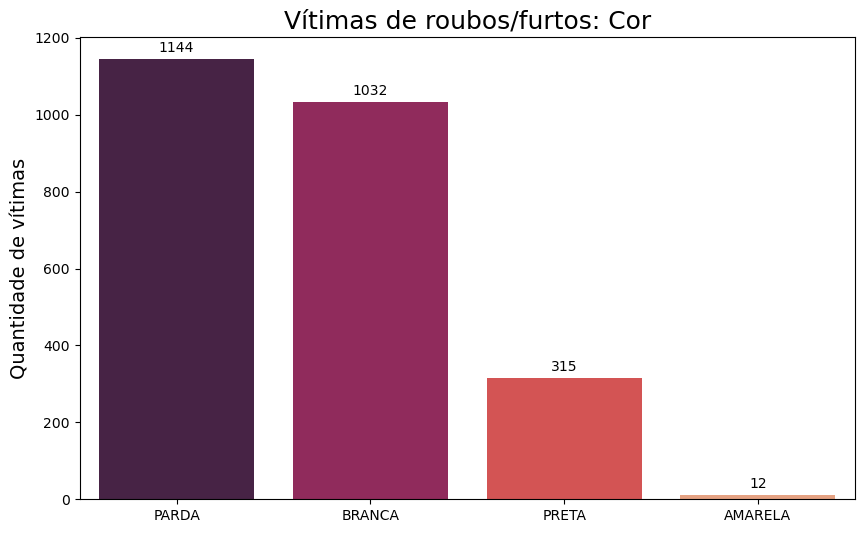

In [25]:
# Filtrando, contando e ordenando os dados.
dados_ignorados = 'NÃO INFORMADA'
dados_filtrados = dados_vitimas.dropna(subset=['cor'])
dados_filtrados = dados_filtrados[dados_filtrados['cor'] != dados_ignorados]
dados_ordenados = dados_filtrados['cor'].value_counts().reset_index()
dados_ordenados.columns = ['cor', 'Contagem']
dados_ordenados = dados_ordenados.sort_values(by='Contagem', ascending=False)

# Gerando o gráfico.
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=dados_ordenados, x='cor', y='Contagem', palette='rocket')
ax.set_title('Vítimas de roubos/furtos: Cor', loc='center', fontsize=18)
ax.set_xlabel('')
ax.set_ylabel('Quantidade de vítimas', fontsize=14)

# Adicionando labels aos valores das barras.
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 8), 
                textcoords = 'offset points')

fig = plt.gcf()
plt.show()

# Salvando o gráfico na pasta Graficos.
fig.savefig('Graficos/vitima_cor.png', transparent=False, dpi=300, bbox_inches='tight')

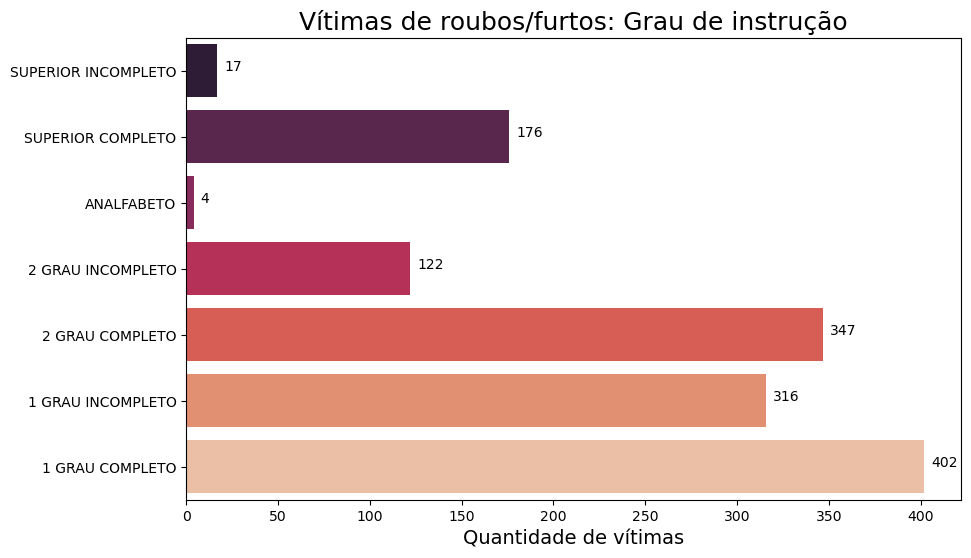

In [26]:
# Filtrando, contando e ordenando os dados.
dados_filtrados = dados_vitimas.dropna(subset=['grau_instrucao'])
dados_filtrados = dados_filtrados[dados_filtrados['grau_instrucao'] != dados_ignorados]
dados_ordenados = dados_filtrados['grau_instrucao'].value_counts().reset_index()
dados_ordenados.columns = ['grau_instrucao', 'Contagem']
dados_ordenados = dados_ordenados.sort_values(by='grau_instrucao', ascending=False)

# Gerando o gráfico.
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=dados_ordenados, x='Contagem', y='grau_instrucao', orient='h', palette='rocket')
ax.set_title('Vítimas de roubos/furtos: Grau de instrução', loc='center', fontsize=18)
ax.set_xlabel('Quantidade de vítimas', fontsize=14)
ax.set_ylabel('')
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.0f'), 
                (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2.), 
                xytext=(5, 0), 
                textcoords='offset points')
fig = plt.gcf()
plt.show()

# Salvando o gráfico na pasta Graficos.
fig.savefig('Graficos/vitima_grau_instrucao.png', transparent=False, dpi=300, bbox_inches='tight')

# <font color='red' style='font-size: 30px;'>Implementando um Modelo Preditivo</font>
<hr style='border: 2px solid red;'>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Para gerar um modelo preditivo, utilizaremos somente o dataframe de ocorrências e selecionar as colunas para separarmos em features e target.
Inicialmente, verificamos quais são as colunas existentes no nosso dataframe.</p>

In [34]:
# Visualizando as 5 primeiras linhas.
dados_ocorrencias.head()

,anoBO,mesBO,diaSemanaBO,numeroBO,numeroBoletim,boIniciado,boEmitido,dataOcorrencia,horaOcorrencia,mesOcorrencia,diaSemanaOcorrencia,periodoOcorrencia,dataComunicacao,boAutoria,flagrante,numeroBoletimPrincipal,logradouro,numero,bairro,cidade,descricaoLocal,solucao,tipoDelegacia,rubrica,consumado,vitimaFatal,anoOcorrencia
0,2022,12,5,3290,3290/2022,2022-12-01 00:02:34,2022-12-01 00:02:34,2022-11-22,19:30:00,11,3,NOITE,2022-11-23,DESCONHECIDA,False,3289/2022 - 20138,NaN,0,MANDAQUI,SÃO PAULO,CONDOMINIO RESIDENCIAL,ENCAMINHAMENTO DP ÁREA DO FATO,True,ENTREGA DE VEÍCULO LOCALIZADO/APREENDIDO,1,0,2022
1,2022,12,5,3290,3290/2022,2022-12-01 00:02:34,2022-12-01 00:02:34,2022-11-22,19:30:00,11,3,NOITE,2022-11-23,DESCONHECIDA,False,3289/2022 - 20138,NaN,0,MANDAQUI,SÃO PAULO,CONDOMINIO RESIDENCIAL,ENCAMINHAMENTO DP ÁREA DO FATO,True,ENTREGA DE VEÍCULO LOCALIZADO/APREENDIDO,1,0,2022
2,2022,12,5,3290,3290/2022,2022-12-01 00:02:34,2022-12-01 00:02:34,2022-11-22,19:30:00,11,3,NOITE,2022-11-23,DESCONHECIDA,False,3289/2022 - 20138,NaN,0,MANDAQUI,SÃO PAULO,CONDOMINIO RESIDENCIAL,ENCAMINHAMENTO DP ÁREA DO FATO,True,FURTO (ART. 155) - RESIDENCIA,1,0,2022
3,2022,12,5,3290,3290/2022,2022-12-01 00:02:34,2022-12-01 00:02:34,2022-11-22,19:30:00,11,3,NOITE,2022-11-23,DESCONHECIDA,False,3289/2022 - 20138,NaN,0,MANDAQUI,SÃO PAULO,CONDOMINIO RESIDENCIAL,ENCAMINHAMENTO DP ÁREA DO FATO,True,FURTO (ART. 155) - RESIDENCIA,1,0,2022
4,2022,12,5,193386,193386/2022,2022-12-01 00:14:04,2022-12-01 00:14:04,2022-11-30,07:00:00,11,4,MANHÃ,2022-11-30,DESCONHECIDA,False,NaN,RUA DESEMBARGADOR PAULO PASSALAQUA,72,CONSOLACAO,SÃO PAULO,VIA PÚBLICA,BO PARA REGISTRO,False,FURTO (ART. 155) - OUTROS,1,0,2022


### Separando os dados

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Por termos mais dados da cidade de São Paulo, trabalharemos somente com os 10 principais bairros onde há mais ocorrências. Assim, filtraremos os dados da seguinte forma:</p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Nesse caso, selecionamos as colunas abaixo para criarmos uma nova dataframe a fim de gerar um modelo preditivo.</p>
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
<li>dataOcorrencia</li>
<li>diaSemanaOcorrencia</li>
<li>horaOcorrencia</li>
<li>bairro</li>
<li>consumado</li>
</ul>

In [35]:
# Criando um novo dataframe.
dados_ML = dados_ocorrencias[['dataOcorrencia', 'diaSemanaOcorrencia', 'horaOcorrencia', 'cidade', 'bairro', 'consumado']]
dados_ML

,dataOcorrencia,diaSemanaOcorrencia,horaOcorrencia,cidade,bairro,consumado
0,2022-11-22,3,19:30:00,SÃO PAULO,MANDAQUI,1
1,2022-11-22,3,19:30:00,SÃO PAULO,MANDAQUI,1
2,2022-11-22,3,19:30:00,SÃO PAULO,MANDAQUI,1
3,2022-11-22,3,19:30:00,SÃO PAULO,MANDAQUI,1
4,2022-11-30,4,07:00:00,SÃO PAULO,CONSOLACAO,1
...,...,...,...,...,...,...
1403247,2022-11-30,4,19:00:00,SÃO PAULO,CAMBUCI,1
1403248,2022-11-30,4,18:40:00,SÃO PAULO,BRAS,1
1403249,2022-11-30,4,18:40:00,SÃO PAULO,CAMPO BELO,1
1403250,2022-11-30,4,20:40:00,JAU,JARDIM SANTA ROSA,1


In [36]:
dados_ML['dataOcorrencia'] = pd.to_datetime(dados_ML['dataOcorrencia'])
dados_ML['dia'] = dados_ML['dataOcorrencia'].dt.day
dados_ML['mes'] = dados_ML['dataOcorrencia'].dt.month
dados_ML['ano'] = dados_ML['dataOcorrencia'].dt.year

C:\Users\natsu\AppData\Local\Temp\ipykernel_13640\3609531849.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_ML['dataOcorrencia'] = pd.to_datetime(dados_ML['dataOcorrencia'])
C:\Users\natsu\AppData\Local\Temp\ipykernel_13640\3609531849.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_ML['dia'] = dados_ML['dataOcorrencia'].dt.day
C:\Users\natsu\AppData\Local\Temp\ipykernel_13640\3609531849.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [37]:
dados_ML['ano'].value_counts()

2022    427497
2021    347456
2020    343400
2023    284899
Name: ano, dtype: int64

In [38]:
# Selecionando somente os dados da cidade de São Paulo e eliminando os dados duplicados.
selecao = 'SÃO PAULO'
dados_ML = dados_ML[dados_ML['cidade'] == selecao]
dados_ML.drop_duplicates(inplace=True)

# Verificando o tamanho do dataset.
linha, coluna = dados_ML.shape
print(f'linhas: {linha}\ncolunas: {coluna}')

linhas: 512586
colunas: 9


C:\Users\natsu\AppData\Local\Temp\ipykernel_13640\2857876074.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_ML.drop_duplicates(inplace=True)


In [39]:
# Filtrando os dados somente dos 10 bairros com mais ocorrências.
selecao = dados_ML['bairro'].value_counts().head(10)
dados_ML = dados_ML[dados_ML['bairro'].isin(selecao.index)]
dados_ML.reset_index(drop=True, inplace=True)

# Excluindo a coluna cidade.
dados_ML.drop(columns='cidade', inplace=True)

# Verificando o tamanho do dataset.
linha, coluna = dados_ML.shape
print(f'linhas: {linha}\ncolunas: {coluna}')

linhas: 87103
colunas: 8


In [40]:
# Criando a colunas dia, mês e ano.
dados_ML['dataOcorrencia'] = pd.to_datetime(dados_ML['dataOcorrencia'])
dados_ML['dia'] = dados_ML['dataOcorrencia'].dt.day
dados_ML['mes'] = dados_ML['dataOcorrencia'].dt.month
dados_ML['ano'] = dados_ML['dataOcorrencia'].dt.year
dados_ML.drop(columns=['dataOcorrencia'], inplace=True)

linha, coluna = dados_ML.shape
print(f'linhas: {linha}\ncolunas: {coluna}')

linhas: 87103
colunas: 7


In [41]:
# Tratar a coluna horaOcorrencia.
dados_ML['horaOcorrencia'] = pd.to_datetime(dados_ML['horaOcorrencia'], format='%H:%M:%S').dt.time

# Criando uma função para mapear cada hora para um período do dia
def periodo_do_dia(hora):
    if 1 < hora.hour <= 2:
        return '01:00-02:00'
    elif 2 < hora.hour <= 4:
        return '03:00-04:00'
    elif 4 < hora.hour <= 6:
        return '05:00-06:00'
    elif 6 < hora.hour <= 8:
        return '07:00-08:00'
    elif 8 < hora.hour <= 10:
        return '09:00-10:00'
    elif 10 < hora.hour <= 12:
        return '11:00-12:00'
    elif 12 < hora.hour <= 14:
        return '13:00-14:00'
    elif 14 < hora.hour <= 16:
        return '15:00-16:00'
    elif 16 < hora.hour <= 18:
        return '17:00-18:00'
    elif 18 < hora.hour <= 20:
        return '19:00-20:00'
    elif 20 < hora.hour <= 22:
        return '21:00-22:00'
    else:
        return '23:00-00:00'

# Aplicando a função e criar novas colunas
dados_ML['horaOcorrencia'] = dados_ML['horaOcorrencia'].apply(periodo_do_dia)

In [42]:
# Visualizando o dataframe tratado.
dados_ML['ano'].value_counts()

2020    25304
2022    23637
2021    23365
2023    14797
Name: ano, dtype: int64

### Transformando as colunas categóricas em numéricas

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Ao observarmos o dataframe, notamos que temos 2 colunas com dados categóricos: Bairro e hora ocorrencia.</p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px;'>Ao aplicar labels_encoder na coluna 'bairro', os dados serão substituídos da seguinte forma:</p>
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
<li>BELA VISTA = 0</li>
<li>BOM RETIRO = 1</li>
<li>CAPAO REDONDO = 2</li>
<li>GRAJAU = 3</li>
<li>JARDIM ANGELA = 4</li>
<li>LIBERDADE = 5</li>
<li>PINHEIROS = 6</li>
<li>REPUBLICA = 7</li>
<li>SE = 8</li>
<li>VILA MARIANA = 9</li>
</ul>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px;'>Ao aplicar labels_encoder na coluna 'horaOcorrencia', os dados serão substituídos da seguinte forma:</p>
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
<li>01:00-02:00 = 0</li>
<li>03:00-04:00 = 1</li>
<li>05:00-06:00 = 2</li>
<li>07:00-08:00 = 3</li>
<li>09:00-10:00 = 4</li>
<li>11:00-12:00 = 5</li>
<li>13:00-14:00 = 6</li>
<li>15:00-16:00 = 7</li>
<li>17:00-18:00 = 8</li>
<li>19:00-20:00 = 9</li>
<li>21:00-22:00 = 10</li>
<li>23:00-00:00 = 11</li>
</ul>

In [43]:
# Importando o LabelEncoder para transformar as variáveis categóricas em numéricas.
from sklearn.preprocessing import LabelEncoder

# Instanciando o LabelEncoder.
label_encoder = LabelEncoder()

# Ajustando e transformando a coluna "bairro"
dados_ML['bairro'] = label_encoder.fit_transform(dados_ML['bairro'])

# Ajustando e transformando a coluna "horaOcorrencia"
dados_ML['horaOcorrencia'] = label_encoder.fit_transform(dados_ML['horaOcorrencia'])

dados_ML.head(10)

,diaSemanaOcorrencia,horaOcorrencia,bairro,consumado,dia,mes,ano
0,4,9,0,1,30,11,2022
1,4,11,1,1,30,11,2022
2,4,5,1,1,30,11,2022
3,4,11,7,1,30,11,2022
4,4,11,0,1,30,11,2022
5,4,11,8,1,30,11,2022
6,4,3,7,1,30,11,2022
7,6,11,5,1,25,11,2022
8,4,11,0,1,23,11,2022
9,2,11,5,1,28,11,2022


### Separando os dados em features e target

In [44]:
# dados X = dados de entrada (features)
X = dados_ML.drop(['consumado'], axis = 1)
# dados y = dados de saída (target)
y = dados_ML['consumado']

In [45]:
# Visualizando os dados de entrada.
X

,diaSemanaOcorrencia,horaOcorrencia,bairro,dia,mes,ano
0,4,9,0,30,11,2022
1,4,11,1,30,11,2022
2,4,5,1,30,11,2022
3,4,11,7,30,11,2022
4,4,11,0,30,11,2022
...,...,...,...,...,...,...
87098,3,11,5,29,11,2022
87099,4,6,5,30,11,2022
87100,7,10,7,26,11,2022
87101,4,7,7,30,11,2022


In [46]:
# Visualizando os dados de saída.
y

0        1
1        1
2        1
3        1
4        1
        ..
87098    1
87099    1
87100    1
87101    1
87102    1
Name: consumado, Length: 87103, dtype: int64

### Balanceamento de dados

<p style='font-size: 18px; line-height: 2; margin: 10px 50px;'>Podemos observar que a nossa coluna 'consumado' possui mais dados 1 do que 0. Sendo assim, precisamos balancear os dados. Nesse caso, geraremos os dados sintéticos utilizando função SMOTE para gerar mesma quantidade de dados 0.</p>

1    87050
0       53
Name: consumado, dtype: int64

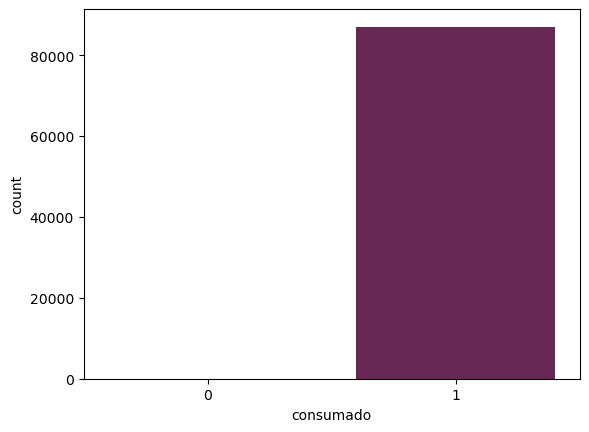

In [47]:
import seaborn as sns
%matplotlib inline
from numpy import random

# Criando um gráfico para verificar a distribuição dos dados 0 e 1 da coluna 'consumado'.
ax = sns.countplot(x='consumado', data=dados_ML)

# Contando os valores da coluna 'consumado'.
dados_ML['consumado'].value_counts()

In [48]:
# Importando a classe SMOTE para gerar dados sintéticos.
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=123)  # Instancia um objeto da classe SMOTE
X, y = smt.fit_resample(X, y)  # Realiza a reamostragem do conjunto de dados.

1    87050
0    87050
Name: consumado, dtype: int64

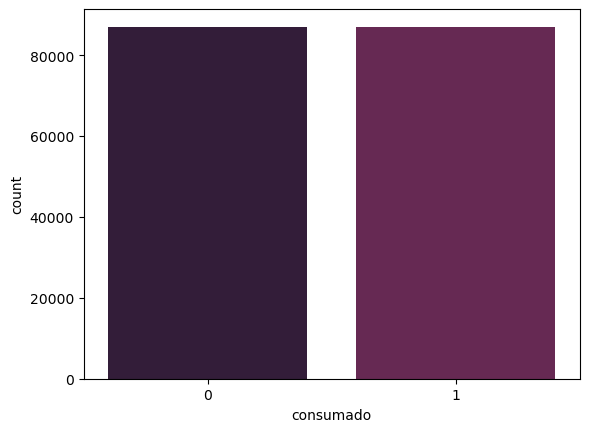

In [49]:
# Concatena a variável target (y) com as features (X)
dados_ML_v1 = pd.concat([X, y], axis=1)

# Criando um gráfico para verificar a distribuição dos dados 0 e 1 da coluna 'consumado'.
ax = sns.countplot(x='consumado', data=dados_ML_v1)

# Verifica se o balanceamento foi realizado.
dados_ML_v1['consumado'].value_counts()

### Normalizando os dados com StandardScaler

In [50]:
from sklearn.preprocessing import StandardScaler

# Deixando os dados do feature na mesma escala.
norm = StandardScaler()

x_norm = norm.fit_transform(X)
x_norm[0]

array([ 0.07936711,  0.69130518, -1.7295853 ,  1.7432335 ,  1.61740899,
        0.99262984])

### Separando os dados de treino e teste com train_test_split

In [51]:
from sklearn.model_selection import train_test_split
# Definindo a semente para o random.
SEED = 123143
random.seed(SEED)

# Separando os dados em treino e teste.
X_treino, X_teste, y_treino, y_teste = train_test_split(x_norm, # Dados de entrada normalizados
                                                        y, # Dados de saída (target)
                                                        test_size = 0.3, # 30% dos dados para teste. Demais 70% para treino.
                                                        random_state = SEED, #random_state: Estado de aleatoriedade.
                                                        stratify=y)

<font color='red' style='font-size: 30px;'>Implementação de algoritmo de ML</font>
<hr style='border: 2px solid red;'>

<font color='red' style='font-size: 30px;'>Implementando método baseado na proximidade: KNN</font>

In [52]:
# Importando biblioteca para criar o modelo de machine learning.
from sklearn.neighbors import KNeighborsClassifier

# Definindo a semente para o random.
SEED = 123143
random.seed(SEED)

# Instanciando o modelo.
knn = KNeighborsClassifier(metric='chebyshev', n_neighbors=50, p=5, weights='distance')

# treinando o modelo com os dados de treino.
knn.fit(X_treino, y_treino)

# Realizando a previsão com os dados de teste.
predito_knn = knn.predict(X_teste)
predito_knn

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

     Acurácia  Precisão   Recall        F1   ROC AUC
KNN  0.968811  0.999714  0.93789  0.967816  0.968811


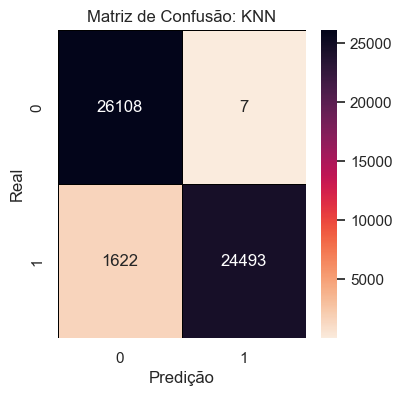

In [53]:
# Importando a biblioteca.
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

def calculando_metrica(y_teste, predito, modelo):
    
    metricas = {'Acurácia': [accuracy_score(y_teste, predito)],
            'Precisão': [precision_score(y_teste, predito)],
            'Recall': [recall_score(y_teste, predito)],
            'F1': [f1_score(y_teste, predito)],
            'ROC AUC': [roc_auc_score(y_teste, predito)]}
    
    # Criando um dataframe com as métricas.
    df_metricas = pd.DataFrame(metricas, index=[modelo])
    print(df_metricas)
    
    # Printando a matriz de confusão com os dados de teste e o modelo do knn.
    matriz_confusao = confusion_matrix(y_teste, predito)

    # Gerando o gráfico de matriz de confusão.
    plt.figure(figsize=(4,4))
    sns.set(font_scale=1)
    sns.heatmap(matriz_confusao, annot=True, fmt='d', linewidths=0.5, linecolor='black', cmap='rocket_r').set(title = f'Matriz de Confusão: {modelo}', xlabel='Predição', ylabel='Real')
    plt.show()

# Chamando a função para calcular as métricas.
calculando_metrica(y_teste, predito_knn, 'KNN')

<font color='red' style='font-size: 30px;'>Implementando método probabilístico: Bernoulli Naive Bayes</font>

In [54]:
import numpy as np
np.median(X_treino)

-0.060709610668816354

In [55]:
# Importando biblioteca para criar o modelo de machine learning.
from sklearn.naive_bayes import BernoulliNB

# Definindo a semente para o random.
SEED = 123143
random.seed(SEED)

# Instandiando o modelo.
bnb = BernoulliNB(binarize=0.5)

# treinano o modelo com os dados de treino.
bnb.fit(X_treino, y_treino)

# Realizando a previsão com os dados de teste.
predito_bnb = bnb.predict(X_teste)
predito_bnb

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

             Acurácia  Precisão   Recall        F1   ROC AUC
BernoulliNB  0.672066  0.675165  0.66322  0.669139  0.672066


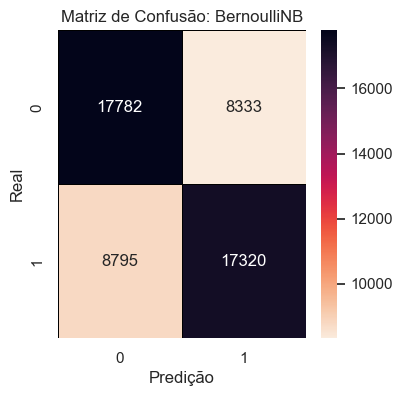

In [56]:
# Chamando a função para calcular as métricas.
calculando_metrica(y_teste, predito_bnb, 'BernoulliNB')

<font color='red' style='font-size: 30px;'>Implementando método simbólico: DecisionTreeClassifier</font>

In [57]:
# Importando a biblioteca.
from sklearn.tree import DecisionTreeClassifier

# Definindo a semente para o random.
SEED = 123143
random.seed(SEED)

# Instanciando o modelo.
dtc = DecisionTreeClassifier(criterion='entropy',
                            max_depth=5,
                            random_state=42)

# Treinando o modelo.
dtc.fit(X_treino, y_treino)

# Realizando a previsão com os dados de teste.
predito_dtc = dtc.predict(X_teste)
predito_dtc

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

                        Acurácia  Precisão    Recall        F1   ROC AUC
DecisionTreeClassifier  0.757228   0.89959  0.579092  0.704608  0.757228


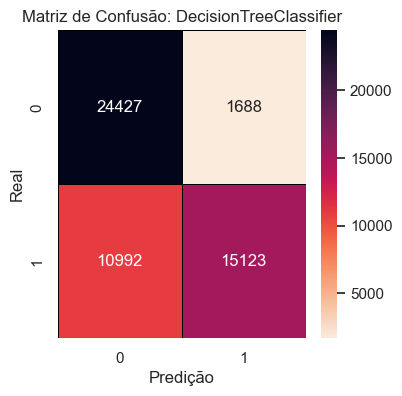

In [58]:
# Chamando a função para calcular as métricas.
calculando_metrica(y_teste, predito_dtc, 'DecisionTreeClassifier')

<font color='red' style='font-size: 30px;'>Implementando método simbólico: RandomForestClassifier</font>

In [59]:
from sklearn.ensemble import RandomForestClassifier

# Definindo a semente para o random.
SEED = 123143
random.seed(SEED)

# Instanciando o classificador.
rfc = RandomForestClassifier(n_estimators = 1000) # n_estimators = Quantas arvores de decisão serão criadas.

# Treinando o modelo.
rfc.fit(X_treino, y_treino)

# Realizando a previsão com os dados de teste.
predito_rfc = rfc.predict(X_teste)
predito_rfc

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

                        Acurácia  Precisão    Recall        F1   ROC AUC
RandomForestClassifier  0.998526  0.999693  0.997358  0.998524  0.998526


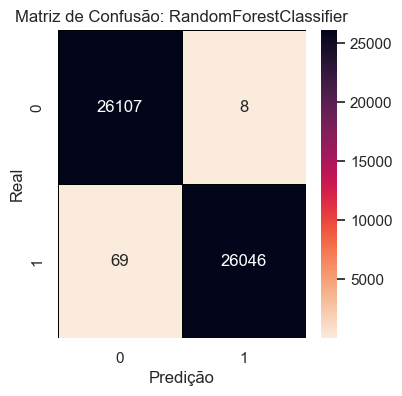

In [60]:
# Chamando a função para calcular as métricas.
calculando_metrica(y_teste, predito_rfc, 'RandomForestClassifier')

<font color='red' style='font-size: 30px;'>Implementando: Regressão Logística</font>

In [61]:
from sklearn.linear_model import LogisticRegression

# Definindo a semente para o random.
SEED = 123143
random.seed(SEED)

# Instanciando o modelo.
lr = LogisticRegression()

# Treinando o modelo.
lr.fit(X_treino, y_treino)

# Realizando a previsão com os dados de teste.
predito_lr = lr.predict(X_teste)
predito_lr

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

                    Acurácia  Precisão    Recall        F1   ROC AUC
LogisticRegression  0.620429  0.617817  0.631514  0.624591  0.620429


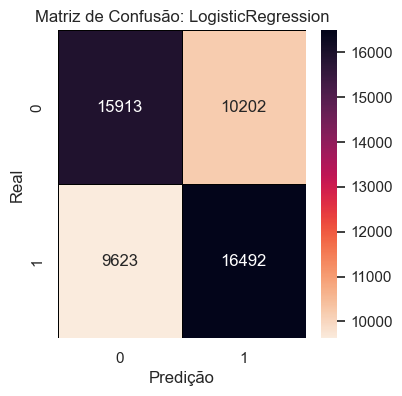

In [62]:
# Chamando a função para calcular as métricas.
calculando_metrica(y_teste, predito_lr, 'LogisticRegression')

## Criando um simulador simples

Gerando um simulador que gere estimativas de ocorrências a partir de um conjunto de informações.

# <font color='red' style='font-size: 30px;'>Salvando e Carregando o Modelo Estimado</font>
<hr style='border: 2px solid red;'>

## Importando a biblioteca pickle

In [63]:
import pickle

## Salvando o modelo estimado